In [1]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [2]:
import mlrose_hiive as mh

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [4]:
import pandas as pd
import importlib
import utility as u

In [5]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [6]:
size = 13
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [7]:

with open(f"{size}_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)


In [8]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [9]:
problem_ffp.length

13

In [10]:
problem_ffp.fitness

143.0

In [11]:
# GAJ runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [12]:
df_run_curves_ffp.shape

(4430, 7)

In [13]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003719,170.0,0.0,40,0.07,2048
1,1,0.018019,191.0,2.0,40,0.07,2048
2,2,0.024100,194.0,4.0,40,0.07,2048
3,3,0.035869,195.0,6.0,40,0.07,2048
4,4,0.039102,195.0,7.0,40,0.07,2048


In [14]:
df_run_curves_ffp['Fitness'].max()

299.0

In [15]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
204,204,1.301966,299.0,228.0,40,0.07,2048
205,205,1.306871,299.0,229.0,40,0.07,2048
206,206,1.310592,299.0,230.0,40,0.07,2048
207,207,1.314833,299.0,231.0,40,0.07,2048
208,208,1.320431,299.0,232.0,40,0.07,2048
...,...,...,...,...,...,...,...
4425,635,4.101017,299.0,660.0,60,0.08,2048
4426,636,4.107090,299.0,661.0,60,0.08,2048
4427,637,4.111945,299.0,662.0,60,0.08,2048
4428,638,4.117116,299.0,663.0,60,0.08,2048


In [16]:
# need to check Time and FEvals

In [17]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [18]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
204,204,1.301966,299.0,228.0,40,0.07,2048
205,205,1.306871,299.0,229.0,40,0.07,2048
206,206,1.310592,299.0,230.0,40,0.07,2048
207,207,1.314833,299.0,231.0,40,0.07,2048
208,208,1.320431,299.0,232.0,40,0.07,2048
...,...,...,...,...,...,...,...
4425,635,4.101017,299.0,660.0,60,0.08,2048
4426,636,4.107090,299.0,661.0,60,0.08,2048
4427,637,4.111945,299.0,662.0,60,0.08,2048
4428,638,4.117116,299.0,663.0,60,0.08,2048


In [19]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,40,0.07,228.0,454.0,1.301966
1,40,0.08,370.0,587.0,0.001488
2,50,0.07,262.0,490.0,0.001488
3,50,0.08,356.0,583.0,0.001488
4,60,0.07,200.0,421.0,1.077192
5,60,0.08,164.0,389.0,0.880226


In [21]:
# tentatively, pick pop size = 60 and mutation_rate = 0.08

In [20]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003719,170.0,0.0,40,0.07,2048
1,1,0.018019,191.0,2.0,40,0.07,2048
2,2,0.024100,194.0,4.0,40,0.07,2048
3,3,0.035869,195.0,6.0,40,0.07,2048
4,4,0.039102,195.0,7.0,40,0.07,2048


In [21]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [24]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[60], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [25]:
df_iter_curves_ffp.shape

(6768, 7)

In [26]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003641,170.0,0.0,60,0.08,2048
1,1,0.030096,196.0,2.0,60,0.08,2048
2,2,0.048169,199.0,4.0,60,0.08,2048
3,3,0.064419,208.0,6.0,60,0.08,2048
4,4,0.077592,208.0,7.0,60,0.08,2048


In [27]:
df_iter_curves_ffp.Fitness.max()

299.0

In [67]:
size

13

In [69]:
df_iter_curves_ffp.to_csv(f'../../csv-files/ga_js_{size}.csv')

In [29]:
#import pandas as pd
#import numpy as np
#size = 13
#df_iter_curves_ffp = pd.read_csv(f'../../csv-files/ga_js_{size}.csv')

In [30]:
df_iter_curves_ffp.Iteration.max()

791

In [31]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [32]:
df_fitness_iter_ffp.shape

(792, 3)

In [33]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,151.1,995.433333
1,1,198.6,88.933333
2,2,202.1,126.322222
3,3,209.6,95.600000
4,4,216.7,136.455556


In [34]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

139    139
140    140
141    141
142    142
143    143
      ... 
655    655
656    656
657    657
658    658
659    659
Name: Iteration, Length: 5010, dtype: int64

In [35]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

291

In [36]:
converge_iter = df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

In [37]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [38]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,151.1,995.433333,31.550489
1,1,198.6,88.933333,9.430447
2,2,202.1,126.322222,11.239316
3,3,209.6,95.600000,9.777525
4,4,216.7,136.455556,11.681419


Text(0, 0.5, 'Fitness')

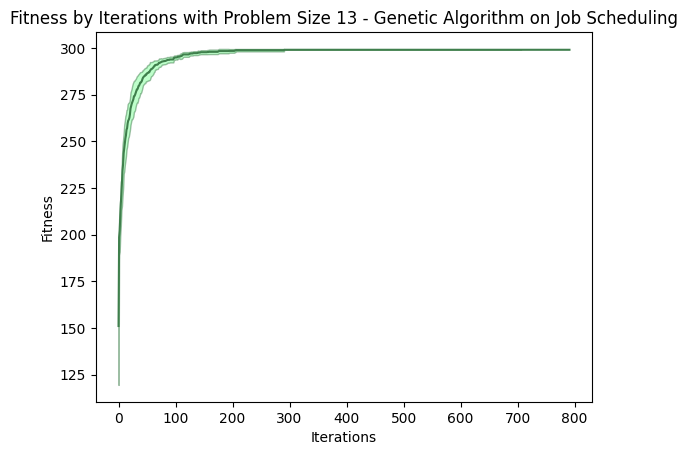

In [39]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - Genetic Algorithm on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [40]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration == 400].avg_fitness

400    299.0
Name: avg_fitness, dtype: float64

In [41]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.max()

(nan, nan)

In [42]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.max()

(nan, nan)

In [43]:
df_fitness_iter_ffp.stddev_fitness.max()

31.550488638582653

In [44]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

13.737620689996584

In [45]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(0    0
 Name: Iteration, dtype: int64,)

In [46]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()].Iteration

7    7
Name: Iteration, dtype: int64

In [47]:
# Fevals - iteration

In [48]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [49]:
df_FEvals_iter_ffp.shape

(792, 3)

In [50]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.9,0.100000
2,2,3.6,0.488889
3,3,5.4,0.488889
4,4,7.1,0.766667


In [51]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [52]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
291,291,317.6,6.488889,2.54733


In [53]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 3.2812599206199216)

In [54]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.9,0.100000,0.316228
2,2,3.6,0.488889,0.699206
3,3,5.4,0.488889,0.699206
4,4,7.1,0.766667,0.875595


Text(0, 0.5, 'FEvals')

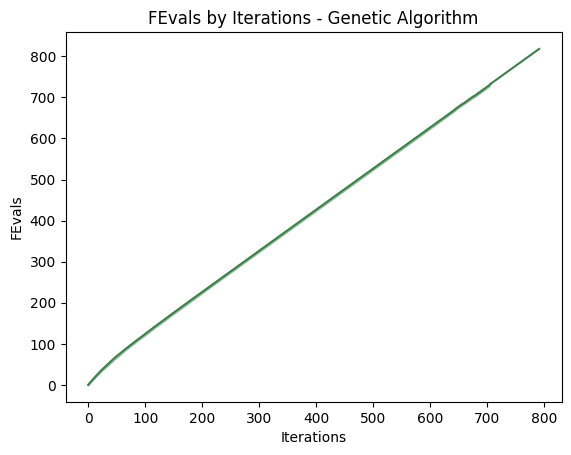

In [55]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [56]:
# fitness - wall clock time

In [57]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [58]:
df_time_iter_ffp.shape

(792, 3)

In [59]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.001215,7.491623e-07
1,1,0.009874,5.190041e-05
2,2,0.017211,1.213248e-04
3,3,0.024858,1.978411e-04
4,4,0.030405,2.836565e-04


In [60]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [61]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.001215,7.491623e-07,0.000866
1,1,0.009874,5.190041e-05,0.007204
2,2,0.017211,1.213248e-04,0.011015
3,3,0.024858,1.978411e-04,0.014066
4,4,0.030405,2.836565e-04,0.016842


Text(0, 0.5, 'Time')

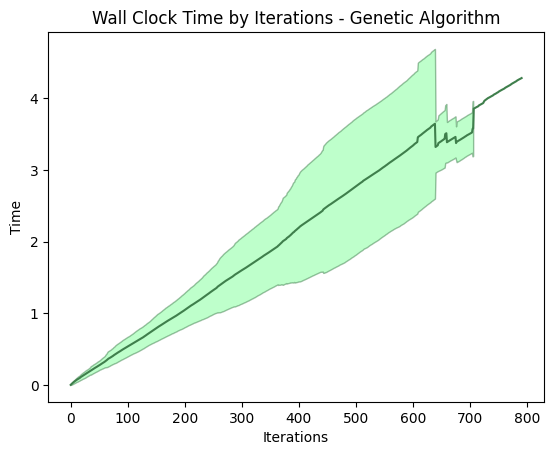

In [62]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [63]:
df_time_iter_ffp.stddev_time.max()

1.0437374177138425

In [64]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == 501]

,Iteration,avg_time,var_time,stddev_time
501,501,2.775142,0.906961,0.952345


In [65]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

635    635
Name: Iteration, dtype: int64

In [66]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_time,var_time,stddev_time
291,291,1.55217,0.200369,0.447626
